## Projekt *
Badanie opiera się na danych dotyczących warunków podruży pasażerów lini lotniczych oraz ich satysfakcji. 
W poniższej analizie po przygotowaniu danych, będziemy dążyli do wytrenowania modelu drzewa decyzyjnego przewidującego satysfakcję pasażera.
Będziemy dążyć do znalezienia możliwie jak najlepsze parametry. 
Skuteczność modelu będziemy sprawdzać stosując 5 krotną walidację krzyżową. 


In [ ]:
%matplotlib inline
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from dtreeviz.trees import *
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split, KFold,StratifiedKFold
from mlxtend import plotting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import datasets

In [ ]:
# pobieramy dane 
df = pd.read_csv("Data/airline.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
pd.set_option("display.max_columns",101)

In [ ]:
#w zbiorze jest mało NA, to po prostu je usuńmy
df.dropna( inplace = True)

In [ ]:
#wywalam zbędne kolumny 
df.drop(columns=["Unnamed: 0","id"],inplace=True)


In [ ]:
#przerabiamy dummies
df_dummy = pd.get_dummies(df[df.columns[[0,1,3,4]]],drop_first = True )
a= df[df.columns[5:]]
b= df[df.columns[2]]

In [ ]:
sett= pd.concat([df_dummy, b,a], axis = 1)

In [ ]:
sett

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,1,0,1,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,0,0,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,0,0,0,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,0,0,0,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,0,0,0,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,1,0,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,1,0,0,0,0,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,1,1,0,0,0,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,0,1,0,1,0,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
#dzielimy zbior na X i Y
X= sett[sett.columns[:-1]]
Y= sett["satisfaction"]

model = DecisionTreeClassifier(random_state=100)
valid = cross_val_score(model,X,Y, cv = 5)



In [ ]:
# ogolny wynik przy cross walidacji wynosi:
print(sum(valid)/5)

0.943046899245789


In [ ]:
#sprawdzmy ktore parametry dadza najlepszy wynik
min_samples= list(range(1,5000,500))
max_depths = list(range(5,15))
max_features= list(range(2,23))

wynik = []

for param in max_depths:
    for i in min_samples:
        for j in max_features:
            model = DecisionTreeClassifier(max_depth=param,min_samples_leaf=i ,max_features =j,random_state=100)
            valid = cross_val_score(model,X,Y, cv = 5)
            s=(i, param,j ,sum(valid)/5)
            wynik.append(s)
            print(s)
            
    
# plt.figure(figsize = (8,4))
# plt.plot(max_depths, train_acc, label = 'train accuracy')
# plt.plot(max_depths, test_acc, label = 'test acuracy')
# plt.legend()
# plt.show()  

(1, 5, 2, 0.7715409007377929)
(1, 5, 3, 0.8278761723865624)
(1, 5, 4, 0.8843465773061489)
(1, 5, 5, 0.8646447009616228)
(1, 5, 6, 0.857926178741508)
(1, 5, 7, 0.8832075052271458)
(1, 5, 8, 0.9039037056099467)
(1, 5, 9, 0.8777535283924888)
(1, 5, 10, 0.8823001660625822)
(1, 5, 11, 0.898575158750982)
(1, 5, 12, 0.895215912084512)
(1, 5, 13, 0.9018766003174393)
(1, 5, 14, 0.9033631212752405)
(1, 5, 15, 0.9166071663088362)
(1, 5, 16, 0.9066355219128065)
(1, 5, 17, 0.907301589804255)
(1, 5, 18, 0.9055157581144737)
(1, 5, 19, 0.9041546885647851)
(1, 5, 20, 0.9055350640655332)
(1, 5, 21, 0.905110333142226)
(1, 5, 22, 0.9056315938208301)
(501, 5, 2, 0.7802864830559646)
(501, 5, 3, 0.8746645981213244)
(501, 5, 4, 0.8651659243664532)
(501, 5, 5, 0.8573372866643136)
(501, 5, 6, 0.8694808920216005)
(501, 5, 7, 0.8887773550419332)
(501, 5, 8, 0.8931694957158014)
(501, 5, 9, 0.8688244682531605)
(501, 5, 10, 0.8740274304502718)
(501, 5, 11, 0.8924744614430091)
(501, 5, 12, 0.8794718214021918)
(501, 5

(501, 6, 21, 0.9109504518282578)
(501, 6, 22, 0.9087591886433186)
(1001, 6, 2, 0.8280692258401684)
(1001, 6, 3, 0.8630036722913863)
(1001, 6, 4, 0.8559666498687747)
(1001, 6, 5, 0.8602333009289123)
(1001, 6, 6, 0.848804007840147)
(1001, 6, 7, 0.8713632464778464)
(1001, 6, 8, 0.8859876814557772)
(1001, 6, 9, 0.8761512080702604)
(1001, 6, 10, 0.8667973578355094)
(1001, 6, 11, 0.8800606585005699)
(1001, 6, 12, 0.878400356959748)
(1001, 6, 13, 0.8886036410857828)
(1001, 6, 14, 0.8835164479681581)
(1001, 6, 15, 0.8858910524590577)
(1001, 6, 16, 0.8936618119114039)
(1001, 6, 17, 0.8884395442291554)
(1001, 6, 18, 0.9018862295309382)
(1001, 6, 19, 0.9066162392578556)
(1001, 6, 20, 0.9026005450609148)
(1001, 6, 21, 0.9030349308234402)
(1001, 6, 22, 0.90892331205751)
(1501, 6, 2, 0.7922177150309209)
(1501, 6, 3, 0.8415159516771803)
(1501, 6, 4, 0.8458212188327362)
(1501, 6, 5, 0.8485047860993016)
(1501, 6, 6, 0.8486881665427244)
(1501, 6, 7, 0.8635925056623872)
(1501, 6, 8, 0.8660539543185024)
(

(1501, 7, 17, 0.8773770851770166)
(1501, 7, 18, 0.8870879967308664)
(1501, 7, 19, 0.8783616966017235)
(1501, 7, 20, 0.8736316910681057)
(1501, 7, 21, 0.8789215691824465)
(1501, 7, 22, 0.8789215691824465)
(2001, 7, 2, 0.7689345405022672)
(2001, 7, 3, 0.8362647329890196)
(2001, 7, 4, 0.8276252322965638)
(2001, 7, 5, 0.8459949789151814)
(2001, 7, 6, 0.8272487401592636)
(2001, 7, 7, 0.8489488290306563)
(2001, 7, 8, 0.8627140741729737)
(2001, 7, 9, 0.8541518499339608)
(2001, 7, 10, 0.8410912235494064)
(2001, 7, 11, 0.8521632861893247)
(2001, 7, 12, 0.8510628097051646)
(2001, 7, 13, 0.8703303841531558)
(2001, 7, 14, 0.8714308056584998)
(2001, 7, 15, 0.8629457623588849)
(2001, 7, 16, 0.863129028651376)
(2001, 7, 17, 0.8646639947987058)
(2001, 7, 18, 0.8750410571781504)
(2001, 7, 19, 0.872695355237257)
(2001, 7, 20, 0.8709288607153207)
(2001, 7, 21, 0.872695355237257)
(2001, 7, 22, 0.872695355237257)
(2501, 7, 2, 0.7724965639521206)
(2501, 7, 3, 0.8443732892764784)
(2501, 7, 4, 0.8417379458864

(2501, 8, 13, 0.8543062635301177)
(2501, 8, 14, 0.8507443495719743)
(2501, 8, 15, 0.8549626640024492)
(2501, 8, 16, 0.8474718604091958)
(2501, 8, 17, 0.8669324808560385)
(2501, 8, 18, 0.8647315660933359)
(2501, 8, 19, 0.8609475745258935)
(2501, 8, 20, 0.8629361037922891)
(2501, 8, 21, 0.8609475745258935)
(2501, 8, 22, 0.8602815192143437)
(3001, 8, 2, 0.7858177764133712)
(3001, 8, 3, 0.811697652610955)
(3001, 8, 4, 0.8357144495524891)
(3001, 8, 5, 0.8211286404543421)
(3001, 8, 6, 0.8069386629909507)
(3001, 8, 7, 0.8310520223023339)
(3001, 8, 8, 0.8444311526167626)
(3001, 8, 9, 0.8418537829905336)
(3001, 8, 10, 0.8283298631683031)
(3001, 8, 11, 0.8336197301005119)
(3001, 8, 12, 0.8381083478804718)
(3001, 8, 13, 0.8395080931636167)
(3001, 8, 14, 0.8493928463362916)
(3001, 8, 15, 0.8395466906221483)
(3001, 8, 16, 0.8395949554997969)
(3001, 8, 17, 0.8396239209492963)
(3001, 8, 18, 0.8583798303857864)
(3001, 8, 19, 0.8643454666408787)
(3001, 8, 20, 0.8602815192143437)
(3001, 8, 21, 0.8539683

(3501, 9, 8, 0.8501554164936291)
(3501, 9, 9, 0.8426646329350291)
(3501, 9, 10, 0.8193331921309603)
(3501, 9, 11, 0.8203370726988753)
(3501, 9, 12, 0.8309071475307748)
(3501, 9, 13, 0.8290151815660727)
(3501, 9, 14, 0.8232233561789417)
(3501, 9, 15, 0.8402513643587273)
(3501, 9, 16, 0.8407726250373313)
(3501, 9, 17, 0.8369113789147882)
(3501, 9, 18, 0.8602815192143437)
(3501, 9, 19, 0.8602815192143437)
(3501, 9, 20, 0.8602815192143437)
(3501, 9, 21, 0.8499430538275086)
(3501, 9, 22, 0.8602815192143437)
(4001, 9, 2, 0.745583769053264)
(4001, 9, 3, 0.7922273768589718)
(4001, 9, 4, 0.8139274797080296)
(4001, 9, 5, 0.7856343298090002)
(4001, 9, 6, 0.8161477185927561)
(4001, 9, 7, 0.8313126386639709)
(4001, 9, 8, 0.8543738096649507)
(4001, 9, 9, 0.8315635778221251)
(4001, 9, 10, 0.8295557975834862)
(4001, 9, 11, 0.8407726250373313)
(4001, 9, 12, 0.8305500195848055)
(4001, 9, 13, 0.8222387205262818)
(4001, 9, 14, 0.8407726250373313)
(4001, 9, 15, 0.8407726250373313)
(4001, 9, 16, 0.839440514

(4001, 10, 19, 0.8305500195848055)
(4001, 10, 20, 0.8434561750647764)
(4001, 10, 21, 0.8434561750647764)
(4001, 10, 22, 0.8434561750647764)
(4501, 10, 2, 0.7387396887288595)
(4501, 10, 3, 0.7926617989634267)
(4501, 10, 4, 0.8119195927732136)
(4501, 10, 5, 0.7846207627191593)
(4501, 10, 6, 0.7877290483291329)
(4501, 10, 7, 0.8305500195848055)
(4501, 10, 8, 0.8338610419088559)
(4501, 10, 9, 0.8318628200635461)
(4501, 10, 10, 0.820645992609701)
(4501, 10, 11, 0.8318628200635461)
(4501, 10, 12, 0.8305500195848055)
(4501, 10, 13, 0.8144873206060449)
(4501, 10, 14, 0.8318628200635461)
(4501, 10, 15, 0.8313126004583526)
(4501, 10, 16, 0.8318628200635461)
(4501, 10, 17, 0.8318628200635461)
(4501, 10, 18, 0.8434561750647764)
(4501, 10, 19, 0.8305500195848055)
(4501, 10, 20, 0.8434561750647764)
(4501, 10, 21, 0.8434561750647764)
(4501, 10, 22, 0.8434561750647764)
(1, 11, 2, 0.886634312006114)
(1, 11, 3, 0.9205552617217387)
(1, 11, 4, 0.9259320538896206)
(1, 11, 5, 0.9283067184844805)
(1, 11, 6, 

(1, 12, 8, 0.9435392238279905)
(1, 12, 9, 0.9422070805903389)
(1, 12, 10, 0.9415796236691649)
(1, 12, 11, 0.9451899157240444)
(1, 12, 12, 0.945170593465709)
(1, 12, 13, 0.9468791859758209)
(1, 12, 14, 0.9454601776064564)
(1, 12, 15, 0.9475355901755297)
(1, 12, 16, 0.9472653185087522)
(1, 12, 17, 0.946821268588565)
(1, 12, 18, 0.947815545102778)
(1, 12, 19, 0.9468791845780544)
(1, 12, 20, 0.9487132634404418)
(1, 12, 21, 0.9489159931656859)
(1, 12, 22, 0.9486167355488334)
(501, 12, 2, 0.8253179065011711)
(501, 12, 3, 0.8763539909106319)
(501, 12, 4, 0.8822807944164968)
(501, 12, 5, 0.8753113740393786)
(501, 12, 6, 0.8879085481067973)
(501, 12, 7, 0.8993474680794508)
(501, 12, 8, 0.8983919124931445)
(501, 12, 9, 0.8941444811884646)
(501, 12, 10, 0.9025040320788159)
(501, 12, 11, 0.9118868086256041)
(501, 12, 12, 0.8992123040577706)
(501, 12, 13, 0.9089136977535203)
(501, 12, 14, 0.9090005447142688)
(501, 12, 15, 0.908990825577791)
(501, 12, 16, 0.9137016066967292)
(501, 12, 17, 0.91457036

(501, 13, 19, 0.9156322660999301)
(501, 13, 20, 0.921781207319054)
(501, 13, 21, 0.9221769699973285)
(501, 13, 22, 0.9214819534295786)
(1001, 13, 2, 0.834594668980958)
(1001, 13, 3, 0.8517481924001935)
(1001, 13, 4, 0.8450971920869585)
(1001, 13, 5, 0.8664788706788334)
(1001, 13, 6, 0.8534662925181179)
(1001, 13, 7, 0.8627430568615937)
(1001, 13, 8, 0.8759580344087343)
(1001, 13, 9, 0.8775605252584773)
(1001, 13, 10, 0.8824161005444389)
(1001, 13, 11, 0.8720872746213905)
(1001, 13, 12, 0.8790568049561408)
(1001, 13, 13, 0.8925903316276061)
(1001, 13, 14, 0.8885360325173792)
(1001, 13, 15, 0.8882174246868612)
(1001, 13, 16, 0.8902639514791261)
(1001, 13, 17, 0.8882754161557423)
(1001, 13, 18, 0.9109794578129863)
(1001, 13, 19, 0.910265053291875)
(1001, 13, 20, 0.904309121729673)
(1001, 13, 21, 0.9108056651159891)
(1001, 13, 22, 0.9101106508778504)
(1501, 13, 2, 0.8067842866685675)
(1501, 13, 3, 0.8550591317900975)
(1501, 13, 4, 0.849537738812893)
(1501, 13, 5, 0.8530417195424267)
(1501,

(1501, 14, 7, 0.8494990779889463)
(1501, 14, 8, 0.873110398706794)
(1501, 14, 9, 0.8620672418783372)
(1501, 14, 10, 0.8490067179966599)
(1501, 14, 11, 0.8697221847271356)
(1501, 14, 12, 0.8712473795547042)
(1501, 14, 13, 0.8722127004037835)
(1501, 14, 14, 0.8771937378140677)
(1501, 14, 15, 0.8814700138944047)
(1501, 14, 16, 0.8612371460867422)
(1501, 14, 17, 0.8784581765033483)
(1501, 14, 18, 0.8900321621881039)
(1501, 14, 19, 0.8827248597121157)
(1501, 14, 20, 0.8744232457777515)
(1501, 14, 21, 0.8792015129275628)
(1501, 14, 22, 0.8789215691824465)
(2001, 14, 2, 0.7749098996212151)
(2001, 14, 3, 0.8422592307929676)
(2001, 14, 4, 0.8276252322965638)
(2001, 14, 5, 0.8455509364497488)
(2001, 14, 6, 0.8278858714883871)
(2001, 14, 7, 0.8489488290306563)
(2001, 14, 8, 0.8560534297367305)
(2001, 14, 9, 0.8541518499339608)
(2001, 14, 10, 0.844334629384376)
(2001, 14, 11, 0.8521632861893247)
(2001, 14, 12, 0.8539683725787267)
(2001, 14, 13, 0.8703303841531558)
(2001, 14, 14, 0.8670966196456614

In [ ]:
#najlepszy wynik tego modelu trenowanego tylko na danych testowych osiągniemy przy wykorzystaniu takich parametrów
lista = []
for i,j in enumerate(wynik):
    lista.append(j[3])


wartosc_max = max(lista)
numer = lista.index(wartosc_max)
wynik[numer]


(1, 14, 22, 0.95170570495746)

In [ ]:
# trenujemy teraz model na wszystkich danych, przy ustalonych parametrach

X= sett[sett.columns[:-1]]
Y= sett["satisfaction"]

model = DecisionTreeClassifier(min_samples_leaf= 1, max_depth = 14,max_features =22, random_state=100)
model.fit(X,Y)

DecisionTreeClassifier(max_depth=14, max_features=22, random_state=100)

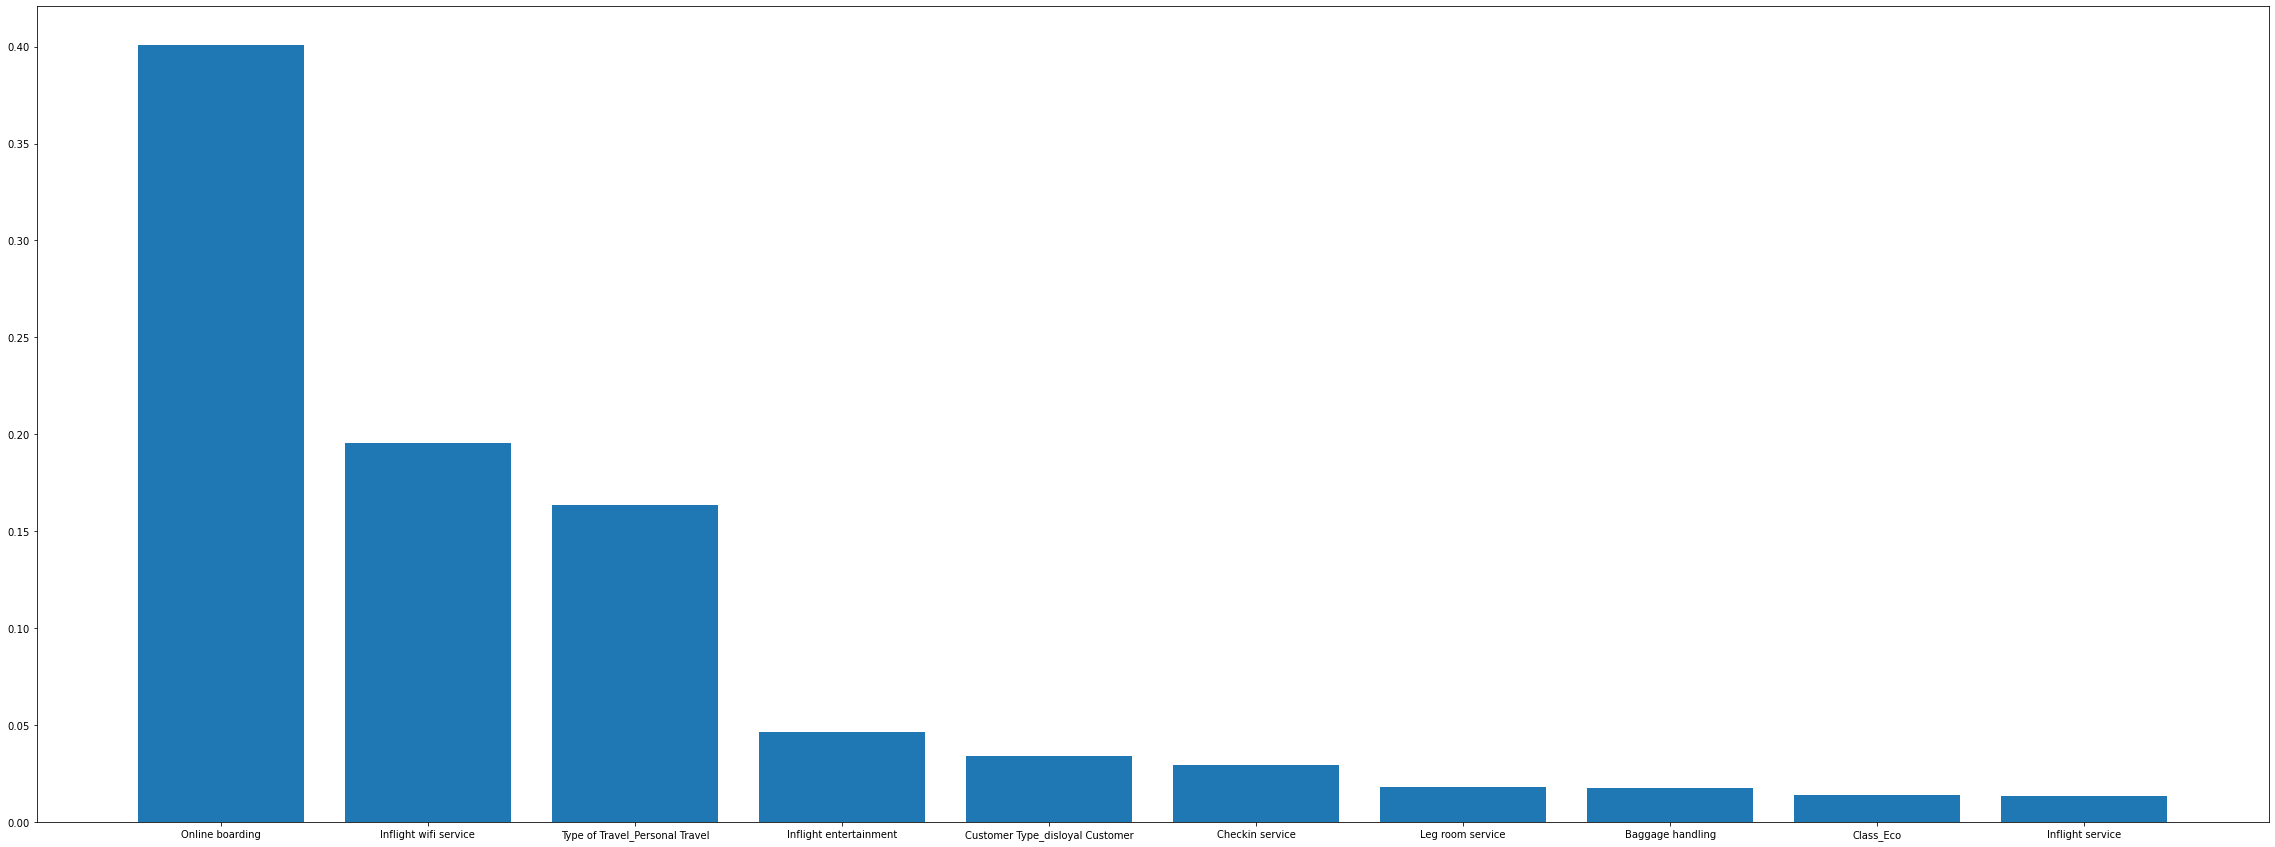

In [ ]:
#sprawdzmy, ktore parametry najbardziej wplywaja na zadowolenie klienta:
h = model.feature_importances_

#posortujemy wartości
ranking_zmiennych = pd.DataFrame({"name":X.columns.to_numpy(),"value":h}).sort_values(by= "value",ascending = False)

#wykres
plt.figure(figsize = (40,15))
plt.bar(ranking_zmiennych["name"].head(10),ranking_zmiennych["value"].head(10))
pass

In [ ]:
ranking_zmiennych

,name,value
12,Online boarding,0.400690
7,Inflight wifi service,0.195464
2,Type of Travel_Personal Travel,0.163593
14,Inflight entertainment,0.046351
1,Customer Type_disloyal Customer,0.033843
18,Checkin service,0.029248
16,Leg room service,0.018026
17,Baggage handling,0.017486
3,Class_Eco,0.013921
19,Inflight service,0.013306
